At John Lucey's suggestion, what does our sample look like at different redshifts?

In [1]:
import numpy as np

from astropy.io import fits
from astropy.table import Table

import pickle

import matplotlib.pyplot as plt

# Data

In [2]:
hdul = fits.open('/global/cfs/cdirs/desicollab/science/td/pv/tfgalaxies/Y1/DESI-DR1_TF_pv_cat_v10.fits')
tf_data = Table(hdul[1].data)
tf_header = hdul[0].header
hdul.close()

In [7]:
dwarf_boolean = tf_data['DWARF']

# Calibrated TFR

In [3]:
logv = np.linspace(-1, 3.5, 100)

In [4]:
temp_infile = open('cov_ab_iron_jointTFR_varyV0-perpdwarfs0_z0p1_binaryMLupdated_Anthony2_weightsVmax-1_dVsys_KAD-20250717.pickle', 'rb')
cov_ab, tfr_samples, V0 = pickle.load(temp_infile)
temp_infile.close()

In [5]:
slope = np.median(tfr_samples[0])
slope_err = np.sqrt(cov_ab[0,0])

ZP = np.median(tfr_samples[1])
ZP_err = np.sqrt(cov_ab[1,1])

absmag = slope*(logv - V0) + ZP

In [6]:
# Calculate the uncertainties in the calibrated TFR
slopes = tfr_samples[0]
ZPs = tfr_samples[1]

N_samples = len(slopes)

lines = []

for i in range(N_samples):
    lines.append(slopes[i]*(logv - V0) + ZPs[i])
    
lines_array = np.asarray(lines)
line_err = np.nanpercentile(lines_array, [16 ,84], axis=0)

# Full TFR

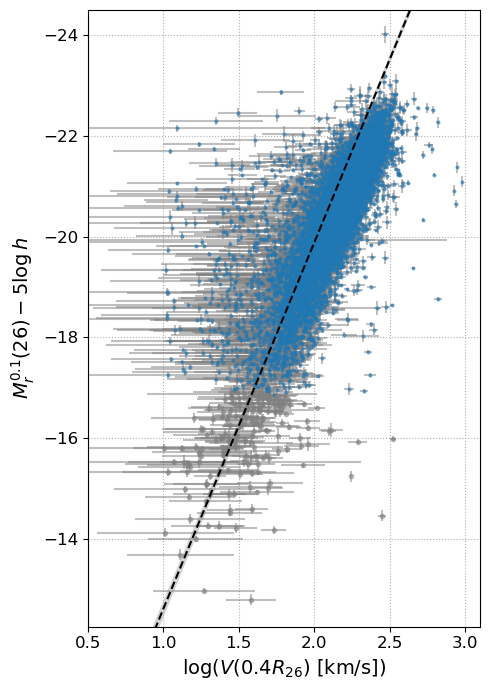

In [10]:
# yvals_perp = -(logv - V0)/slope + b_perp

plt.figure(figsize=(5,7), tight_layout=True)

plt.grid(ls=':')

plt.fill_between(logv, line_err[0], line_err[1], color='lightgray')

sample = ~dwarf_boolean# & morph_boolean
plt.errorbar(np.log10(tf_data['V_0p4R26'][sample]), 
             tf_data['R_ABSMAG_SB26'][sample], 
             xerr=0.434*tf_data['V_0p4R26_ERR'][sample]/tf_data['V_0p4R26'][sample],
             yerr=tf_data['R_ABSMAG_SB26_ERR'][sample], 
             fmt='.', 
             markersize=4, 
             alpha=0.5, 
             ecolor='gray')

sample = dwarf_boolean# & morph_boolean
plt.errorbar(np.log10(tf_data['V_0p4R26'][sample]), 
             tf_data['R_ABSMAG_SB26'][sample], 
             xerr=0.434*tf_data['V_0p4R26_ERR'][sample]/tf_data['V_0p4R26'][sample],
             yerr=tf_data['R_ABSMAG_SB26_ERR'][sample], 
             fmt='.',
             color='gray',
             alpha=0.5, 
             ecolor='gray')

plt.plot(logv, absmag, 'k--', zorder=3)

# plt.fill_between(logv, yvals_perp, -12, color='gainsboro')

plt.xlim([0.5, 3.1])
plt.ylim([-12.25, -24.5])

plt.xlabel('log($V(0.4R_{26})$ [km/s])', fontsize=14)
plt.ylabel('$M_r^{0.1} (26) - 5\log h$', fontsize=14);

ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=12);

# TFR as a function of $z$

In [11]:
tf_data.colnames

['SGA_ID',
 'SGA_GALAXY',
 'GALAXY',
 'PGC',
 'RA_LEDA',
 'DEC_LEDA',
 'MORPHTYPE',
 'PA_LEDA',
 'D25_LEDA',
 'BA_LEDA',
 'Z_LEDA',
 'SB_D25_LEDA',
 'MAG_LEDA',
 'BYHAND',
 'REF',
 'GROUP_ID',
 'GROUP_NAME',
 'GROUP_MULT',
 'GROUP_PRIMARY',
 'GROUP_RA',
 'GROUP_DEC',
 'GROUP_DIAMETER',
 'BRICKNAME',
 'RA',
 'DEC',
 'D26',
 'D26_REF',
 'PA',
 'BA',
 'RA_MOMENT',
 'DEC_MOMENT',
 'SMA_MOMENT',
 'G_SMA50',
 'R_SMA50',
 'Z_SMA50',
 'SMA_SB22',
 'SMA_SB22.5',
 'SMA_SB23',
 'SMA_SB23.5',
 'SMA_SB24',
 'SMA_SB24.5',
 'SMA_SB25',
 'SMA_SB25.5',
 'SMA_SB26',
 'G_MAG_SB22',
 'R_MAG_SB22',
 'Z_MAG_SB22',
 'G_MAG_SB22.5',
 'R_MAG_SB22.5',
 'Z_MAG_SB22.5',
 'G_MAG_SB23',
 'R_MAG_SB23',
 'Z_MAG_SB23',
 'G_MAG_SB23.5',
 'R_MAG_SB23.5',
 'Z_MAG_SB23.5',
 'G_MAG_SB24',
 'R_MAG_SB24',
 'Z_MAG_SB24',
 'G_MAG_SB24.5',
 'R_MAG_SB24.5',
 'Z_MAG_SB24.5',
 'G_MAG_SB25',
 'R_MAG_SB25',
 'Z_MAG_SB25',
 'G_MAG_SB25.5',
 'R_MAG_SB25.5',
 'Z_MAG_SB25.5',
 'G_MAG_SB26',
 'R_MAG_SB26',
 'Z_MAG_SB26',
 'SMA_SB22_ERR',

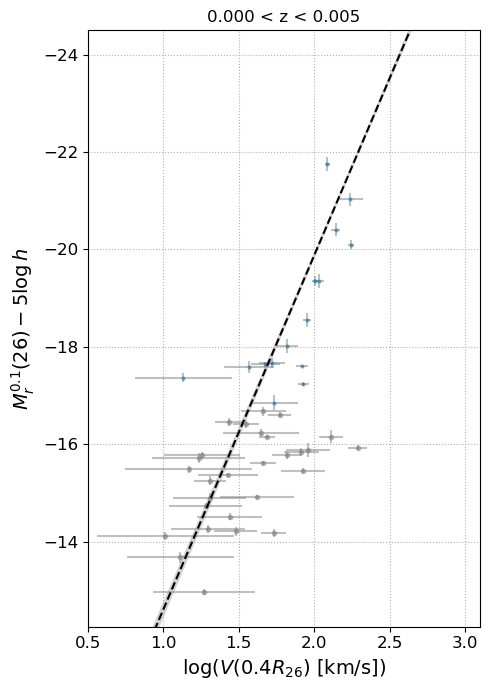

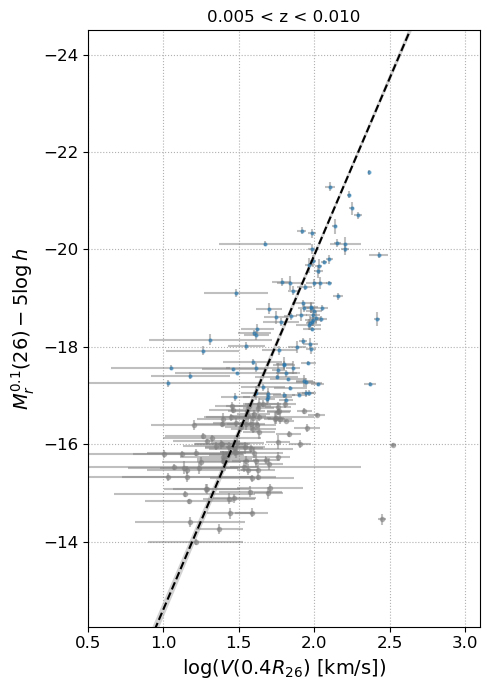

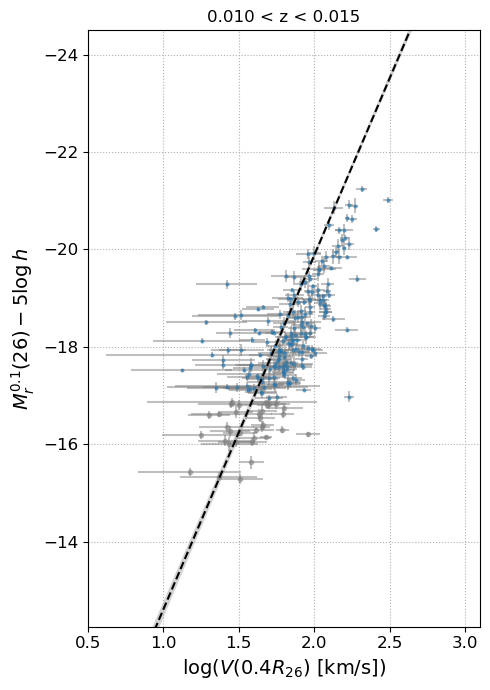

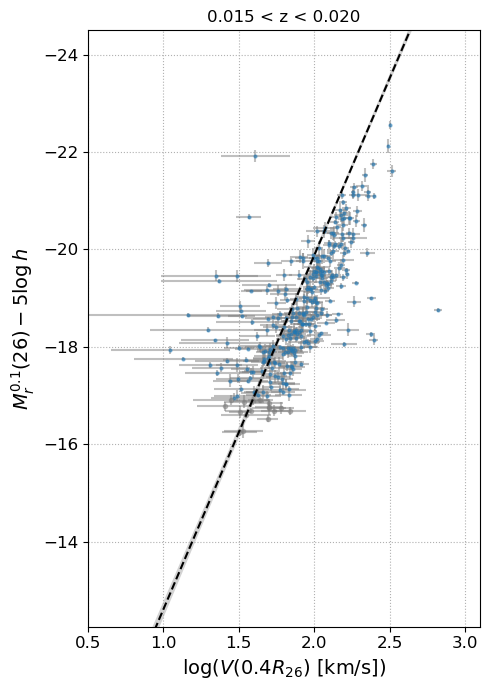

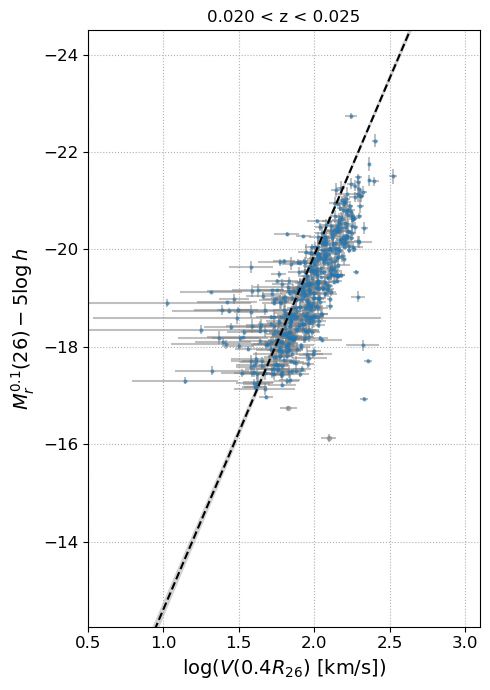

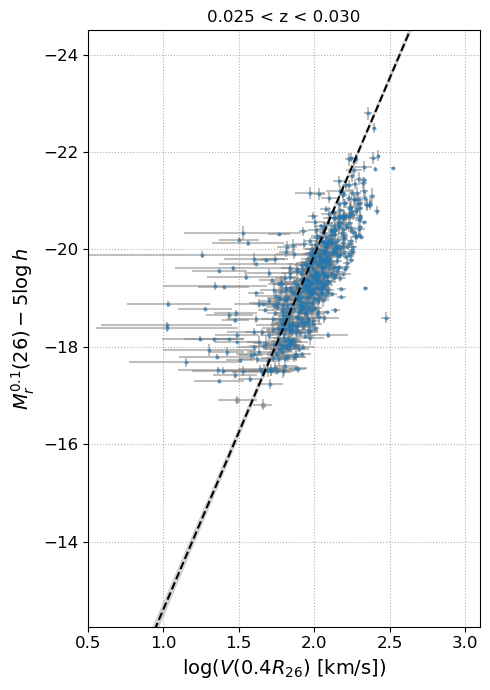

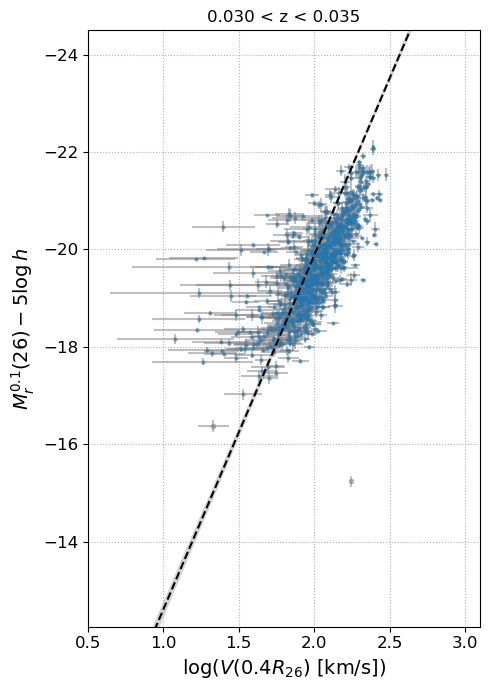

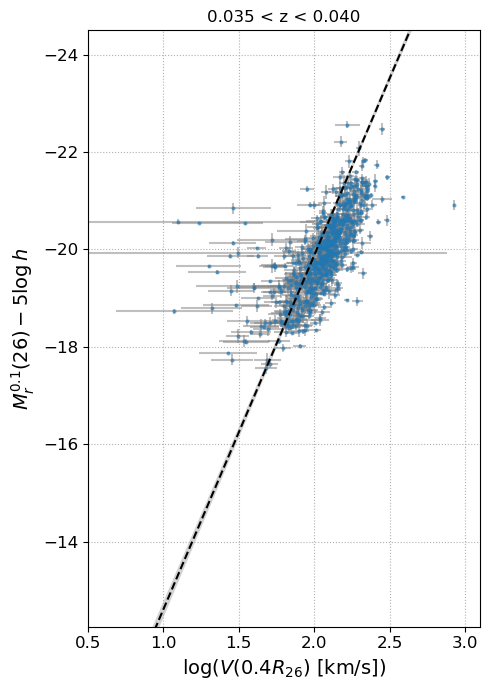

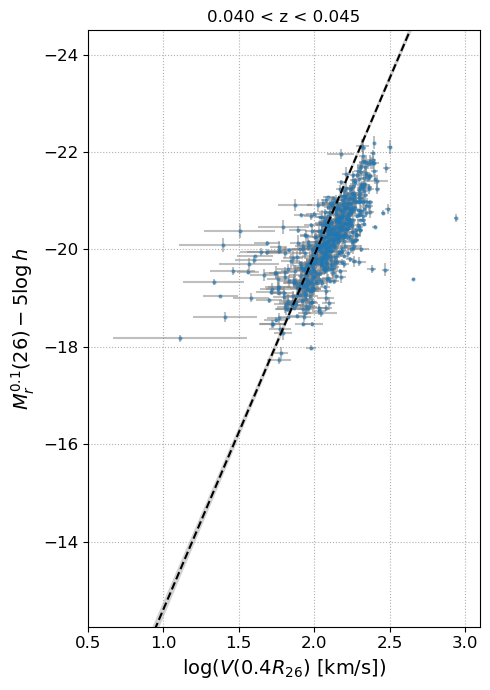

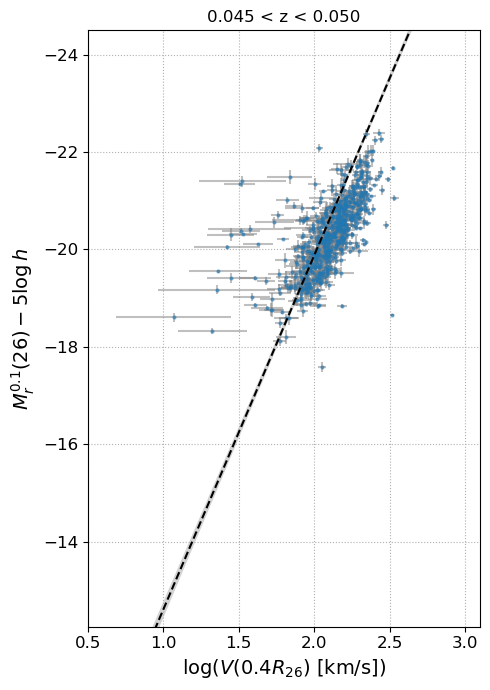

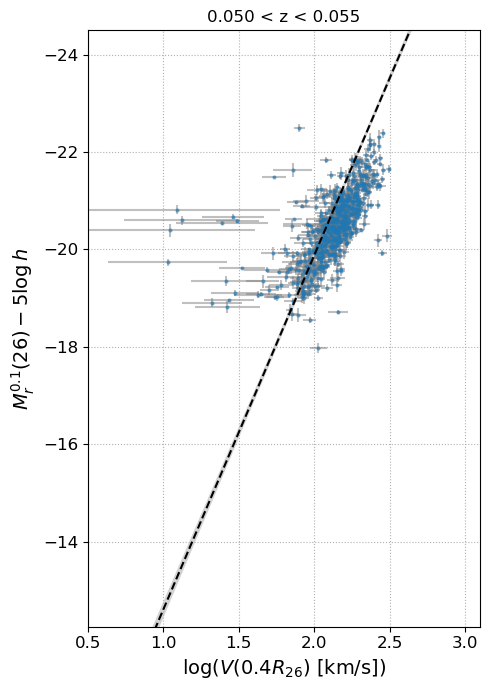

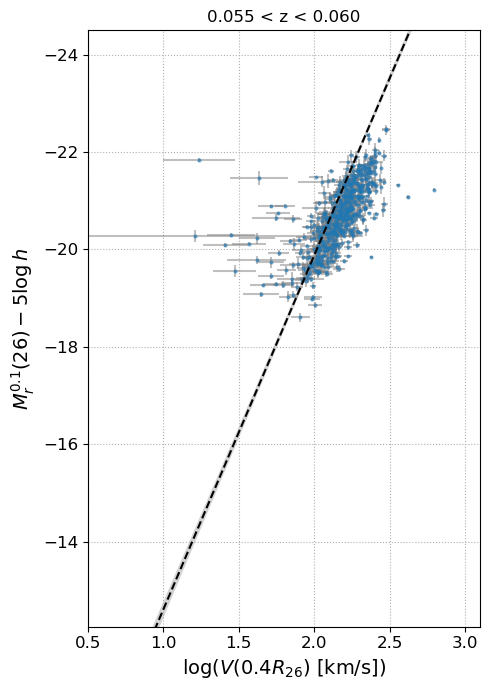

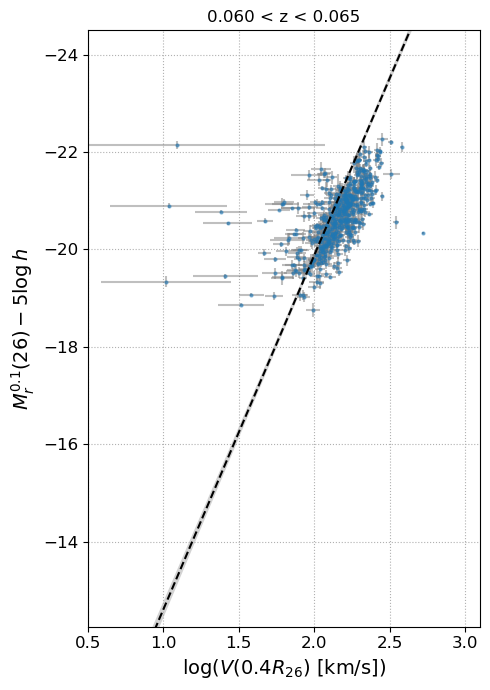

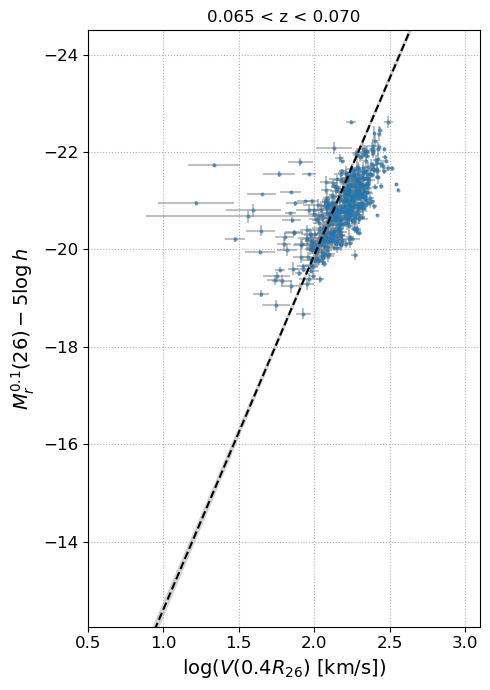

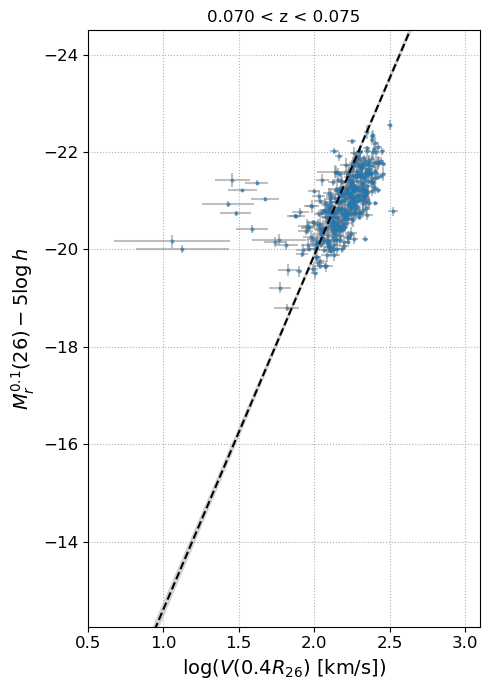

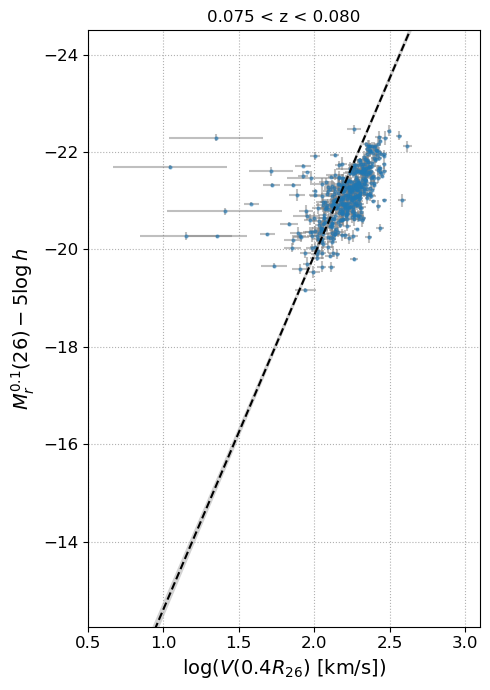

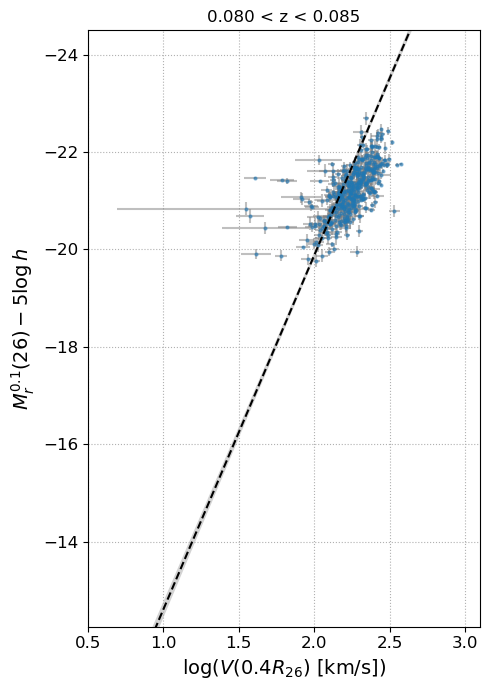

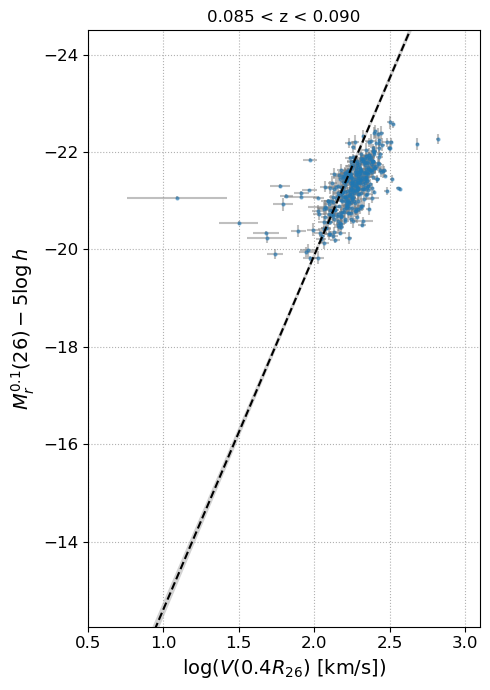

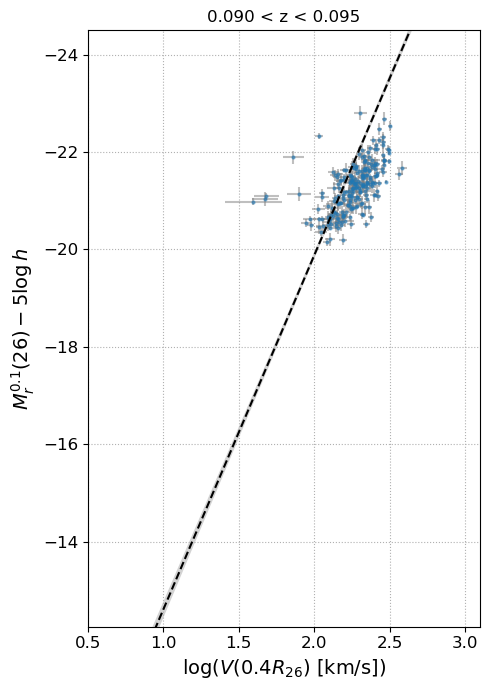

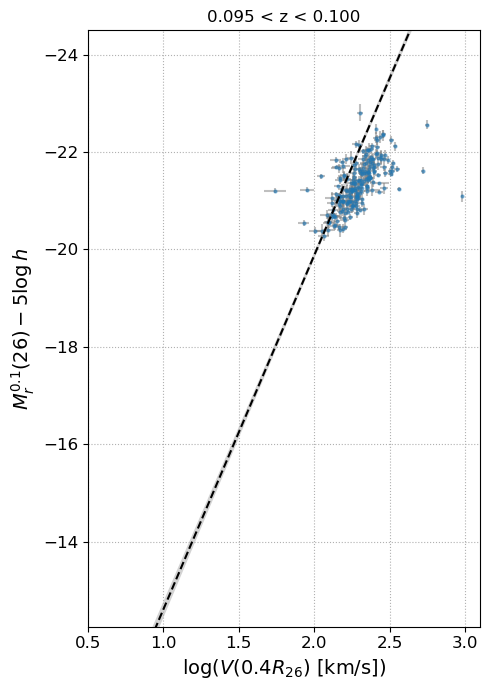

In [12]:
zbins = np.arange(0, 0.105, 0.005)
dz = 0.5*np.diff(zbins)
zc = 0.5*(zbins[1:] + zbins[:-1])

for i in range(len(zbins) - 1):

    # Find galaxies in this redshift range
    idx = (tf_data['Z_DESI_CMB'] > zbins[i]) & (tf_data['Z_DESI_CMB'] <= zbins[i + 1])

    # Plot
    plt.figure(figsize=(5,7), tight_layout=True)

    plt.grid(ls=':')
    
    plt.fill_between(logv, line_err[0], line_err[1], color='lightgray')
    
    sample = ~dwarf_boolean & idx
    plt.errorbar(np.log10(tf_data['V_0p4R26'][sample]), 
                 tf_data['R_ABSMAG_SB26'][sample], 
                 xerr=0.434*tf_data['V_0p4R26_ERR'][sample]/tf_data['V_0p4R26'][sample],
                 yerr=tf_data['R_ABSMAG_SB26_ERR'][sample], 
                 fmt='.', 
                 markersize=4, 
                 alpha=0.5, 
                 ecolor='gray')
    
    sample = dwarf_boolean & idx
    plt.errorbar(np.log10(tf_data['V_0p4R26'][sample]), 
                 tf_data['R_ABSMAG_SB26'][sample], 
                 xerr=0.434*tf_data['V_0p4R26_ERR'][sample]/tf_data['V_0p4R26'][sample],
                 yerr=tf_data['R_ABSMAG_SB26_ERR'][sample], 
                 fmt='.',
                 color='gray',
                 alpha=0.5, 
                 ecolor='gray')
    
    plt.plot(logv, absmag, 'k--', zorder=3)
    
    plt.xlim([0.5, 3.1])
    plt.ylim([-12.25, -24.5])
    
    plt.xlabel('log($V(0.4R_{26})$ [km/s])', fontsize=14)
    plt.ylabel('$M_r^{0.1} (26) - 5\log h$', fontsize=14)

    plt.title('{:.3f} < z < {:.3f}'.format(zbins[i], zbins[i+1]))
    
    ax = plt.gca()
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    plt.show()

# What's the distribution in $\eta$ look like in different redshift bins?

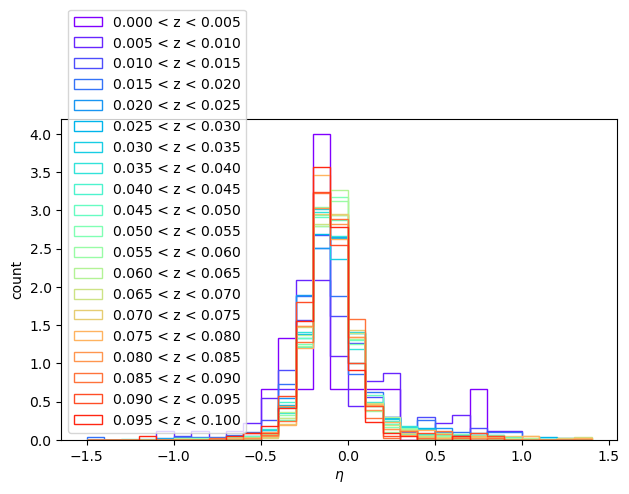

In [25]:
zbins = np.arange(0, 0.105, 0.005)
dz = 0.5*np.diff(zbins)
zc = 0.5*(zbins[1:] + zbins[:-1])

nbins = np.arange(-1.5, 1.5, 0.1)
dn = 0.5*np.diff(nbins)
nc = 0.5*(nbins[1:] + nbins[:-1])


plt.rcParams['axes.prop_cycle'] = plt.cycler('color', plt.cm.rainbow(np.linspace(0,1,len(zbins))))

plt.figure(tight_layout=True)

for i in range(len(zbins) - 1):

    # Find galaxies in this redshift range
    idx = (tf_data['Z_DESI_CMB'] > zbins[i]) & (tf_data['Z_DESI_CMB'] <= zbins[i + 1])

    plt.hist(tf_data['LOGDIST'][~dwarf_boolean & idx], 
             bins=nbins, 
             label='{:.3f} < z < {:.3f}'.format(zbins[i], zbins[i+1]), 
             histtype='step', 
             density=True)

    # plt.vlines(np.median(tf_data['LOGDIST'][~dwarf_boolean & idx]), 0, 300)

plt.xlabel('$\eta$')
plt.ylabel('count')

plt.legend();

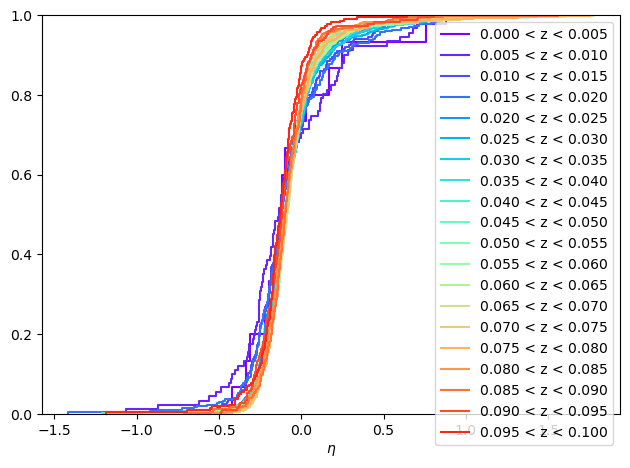

In [26]:
zbins = np.arange(0, 0.105, 0.005)
dz = 0.5*np.diff(zbins)
zc = 0.5*(zbins[1:] + zbins[:-1])

nbins = np.arange(-1.5, 1.5, 0.1)
dn = 0.5*np.diff(nbins)
nc = 0.5*(nbins[1:] + nbins[:-1])


plt.rcParams['axes.prop_cycle'] = plt.cycler('color', plt.cm.rainbow(np.linspace(0,1,len(zbins))))

plt.figure(tight_layout=True)

for i in range(len(zbins) - 1):

    # Find galaxies in this redshift range
    idx = (tf_data['Z_DESI_CMB'] > zbins[i]) & (tf_data['Z_DESI_CMB'] <= zbins[i + 1])

    plt.ecdf(tf_data['LOGDIST'][~dwarf_boolean & idx], 
             label='{:.3f} < z < {:.3f}'.format(zbins[i], zbins[i+1]))

    # plt.vlines(np.median(tf_data['LOGDIST'][~dwarf_boolean & idx]), 0, 300)

plt.xlabel('$\eta$')

plt.legend();

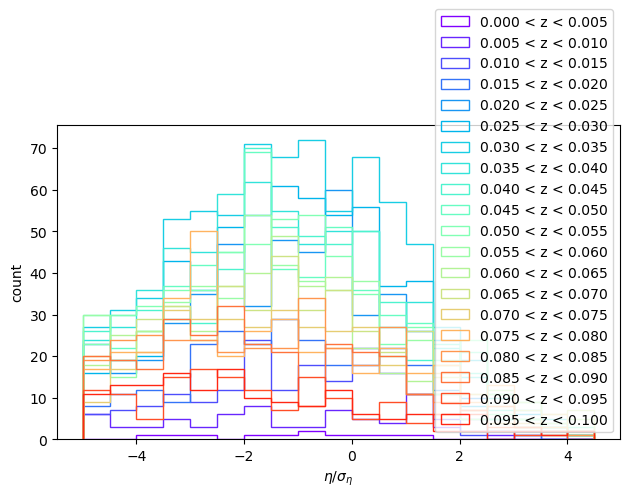

In [24]:
zbins = np.arange(0, 0.105, 0.005)
dz = 0.5*np.diff(zbins)
zc = 0.5*(zbins[1:] + zbins[:-1])

nbins = np.arange(-5, 5, 0.5)
dn = 0.5*np.diff(nbins)
nc = 0.5*(nbins[1:] + nbins[:-1])


plt.rcParams['axes.prop_cycle'] = plt.cycler('color', plt.cm.rainbow(np.linspace(0,1,len(zbins))))

plt.figure(tight_layout=True)

for i in range(len(zbins) - 1):

    # Find galaxies in this redshift range
    idx = (tf_data['Z_DESI_CMB'] > zbins[i]) & (tf_data['Z_DESI_CMB'] <= zbins[i + 1])

    plt.hist(tf_data['LOGDIST'][~dwarf_boolean & idx]/tf_data['LOGDIST_ERR'][~dwarf_boolean & idx], 
             bins=nbins, 
             label='{:.3f} < z < {:.3f}'.format(zbins[i], zbins[i+1]), 
             histtype='step')

    # plt.vlines(np.median(tf_data['LOGDIST'][~dwarf_boolean & idx]), 0, 300)

plt.xlabel('$\eta / \sigma_\eta$')
plt.ylabel('count')

plt.legend();